In [1]:
from qiskit_aer import AerSimulator
from qiskit import *
import supermarq
from qiskit.providers.fake_provider import *
import numpy as np 
import os
import random
########## INPUT ############
f=5 # number of fake_backend want to choose
lower_limit= 3 # the lower limit of qubits for the circuit
upper_limit= 9 # the lower limit of qubits for the circuit
steps= 1 #jump in qubit numbers
name_of_algo='phase_code'

In [2]:
all_fakes=[FakeAlmadenV2,FakeArmonkV2,FakeAthensV2,FakeAuckland,FakeBelemV2,FakeBoeblingenV2,FakeBogotaV2,FakeBrooklynV2,FakeBurlingtonV2,FakeCairoV2,FakeCambridgeV2,FakeCasablancaV2,FakeEssexV2,FakeGeneva,FakeGuadalupeV2,FakeHanoiV2,FakeJakartaV2,FakeJohannesburgV2,FakeKolkataV2,FakeLagosV2,FakeLimaV2,FakeLondonV2,FakeManhattanV2,FakeManilaV2,FakeMelbourneV2,FakeMontrealV2,FakeMumbaiV2,FakeNairobiV2,FakeOslo,FakeOurenseV2,FakeParisV2,FakePerth,FakePrague,FakePoughkeepsieV2,FakeQuitoV2,FakeRochesterV2,FakeRomeV2,FakeSantiagoV2,FakeSherbrooke,FakeSingaporeV2,FakeSydneyV2,FakeTorontoV2,FakeValenciaV2,FakeVigoV2,FakeWashingtonV2,FakeYorktownV2]
selected_fakes = random.sample(all_fakes, f)
selected_fakes  # having any randomly selected 5 fake backends out of 46 mentioned in the inital list

[qiskit.providers.fake_provider.backends.santiago.fake_santiago.FakeSantiagoV2,
 qiskit.providers.fake_provider.backends.belem.fake_belem.FakeBelemV2,
 qiskit.providers.fake_provider.backends.essex.fake_essex.FakeEssexV2,
 qiskit.providers.fake_provider.backends.auckland.fake_auckland.FakeAuckland,
 qiskit.providers.fake_provider.backends.sydney.fake_sydney.FakeSydneyV2]

In [3]:
benchmarks=[]
for i in range(lower_limit,upper_limit,steps):
    label = name_of_algo+str(i)
    rand_list=[]
    for j in range(i):       
        rand_list.append(random.randint(0,1))
    print("i=",i,"i-1=",i-1,"rand_list=",rand_list)
    benchmarks.append((supermarq.phase_code.PhaseCode(i,i-1,rand_list),label))
for i in benchmarks:
    circuit=i[0].qiskit_circuit()
    print("--------------------------",i[1],"---------------------------")
    #circuit.draw(output="mpl")
    print(circuit.draw())

i= 3 i-1= 2 rand_list= [0, 0, 1]
i= 4 i-1= 3 rand_list= [0, 0, 1, 1]
i= 5 i-1= 4 rand_list= [1, 0, 1, 1, 1]
i= 6 i-1= 5 rand_list= [1, 1, 1, 1, 0, 0]
i= 7 i-1= 6 rand_list= [0, 1, 1, 0, 0, 1, 0]
i= 8 i-1= 7 rand_list= [1, 1, 0, 0, 0, 1, 0, 1]
-------------------------- phase_code3 ---------------------------
              ┌───┐┌───┐     ┌───┐┌───┐                  ┌───┐┌───┐        »
         q_0: ┤ H ├┤ H ├──■──┤ H ├┤ H ├───────────────■──┤ H ├┤ H ├────────»
              ├───┤└───┘  │  └───┘├───┤┌─┐     ┌───┐  │  └───┘└───┘┌───┐┌─┐»
         q_1: ┤ H ├───────■────■──┤ H ├┤M├─|0>─┤ H ├──■─────────■──┤ H ├┤M├»
              ├───┤┌───┐       │  ├───┤└╥┘┌───┐└───┘            │  ├───┤└╥┘»
         q_2: ┤ H ├┤ H ├──■────■──┤ H ├─╫─┤ H ├────────────■────■──┤ H ├─╫─»
              ├───┤└───┘  │       ├───┤ ║ └┬─┬┘     ┌───┐  │       ├───┤ ║ »
         q_3: ┤ H ├───────■────■──┤ H ├─╫──┤M├──|0>─┤ H ├──■────■──┤ H ├─╫─»
              ├───┤┌───┐┌───┐  │  ├───┤ ║  └╥┘ ┌───┐└───┘       │  ├───┤ ║

In [4]:
benchmark_features = {}
for benchmark, label in benchmarks:
    benchmark_features[label] = [
        supermarq.converters.compute_communication_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_depth_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_entanglement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_liveness_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_measurement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_parallelism_with_qiskit(benchmark.qiskit_circuit()),]
print(benchmark_features)

{'phase_code3': [0.4, 0.375, 0.22857142857142856, 0.8, 0.15384615384615385, 0.375], 'phase_code4': [0.2857142857142857, 0.3333333333333333, 0.2571428571428571, 0.7687074829931972, 0.2, 0.3888888888888889], 'phase_code5': [0.2222222222222222, 0.25, 0.2711864406779661, 0.7860082304526749, 0.15384615384615385, 0.4212962962962963], 'phase_code6': [0.18181818181818182, 0.2, 0.2840909090909091, 0.790633608815427, 0.3125, 0.4333333333333333], 'phase_code7': [0.15384615384615385, 0.16666666666666666, 0.2938775510204082, 0.7928994082840237, 0.18421052631578946, 0.44017094017094016], 'phase_code8': [0.13333333333333333, 0.14285714285714285, 0.29878048780487804, 0.7985185185185185, 0.3181818181818182, 0.4492063492063492]}


In [5]:
%time
import time
jobs =[]
print("=============SCORES OF ALL THE CIRCUITS=============")    
for backend in selected_fakes:
    print("-----------BACKEND-NAME :: ", backend().name,"----------------")
    for benchmark, label in benchmarks:
        circuit=benchmark.qiskit_circuit()
        score_list=[]
        timetaken=[]
        for i in range(0,5):
            job = backend().run(circuit, shots=1000)
            result = job.result()
            counts = job.result(0).get_counts()
            score = benchmark.score(counts)
            score_list.append(score)
            t=job.result(0).time_taken
            timetaken.append(t)
            print(i+1,"th iteration Execution time::",t)
        score = np.mean(score_list) 
        sd = np.std(score_list)
        execution_time = np.mean(timetaken)
        print("                      Average of Metadata-wise time taken ::",execution_time)
        print("                    ",label, "--> score::",score,"      SD ::",sd)
        jobs.append((label,benchmark,backend,job,score,sd))
#jobs

=============SCORES OF ALL THE CIRCUITS=============
------------------------BACKEND-NAME ::  fake_santiago


NameError: name 'plot_histogram' is not defined

In [ ]:
all_scores={}  
all_fake_names=[]
all_fake_scores=[]
for i in selected_fakes:
    fakes=i
    i={}
    for label,benchmark,backend,job,score,sd in jobs:
        #supermarq.plotting.plot_results([score], [label])
        if fakes == backend:
            i[label] = score
    device_scores = 'device_score_' +str(fakes().name)
    all_scores[device_scores]= i
    all_fake_scores.append(i)
    all_fake_names.append(device_scores)   

In [ ]:
for label,benchmark,backend,job,score,sd in jobs:
    print("USED BACKEND::",backend().name,"; CIRCUIT_NAME:",label, "; SCORE =",score)
    supermarq.plotting.plot_results([score], [label])
    print("-----------------------------------------------------------")

In [ ]:
names=[]
scores=[]
X="A "+name_of_algo+' Benchamrk'
for i,j in benchmark_features.items():
    names.append(i)
    scores.append(j)
supermarq.plotting.plot_benchmark(
        [X,names,scores],
        spoke_labels=["PC", "CD", "Ent", "Liv", "Mea", "Par"],
        show=True)

In [ ]:
supermarq.plotting.plot_correlations(benchmark_features,all_fake_scores,["PC", "CD", "Ent", "Liv", "Mea", "Par"],device_name=all_fake_names,show=True,)

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (5,) and arg 1 with shape (0,).

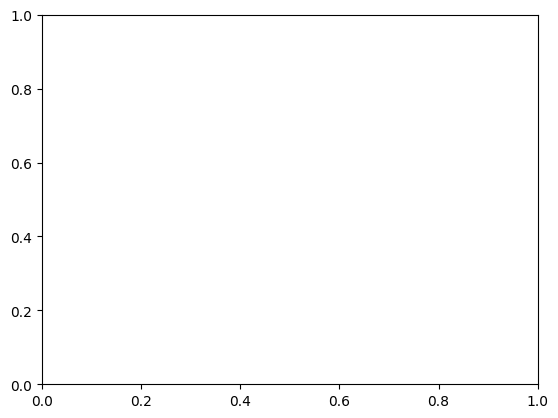

In [6]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np
all_fake_names=[]
all_score=[]
all_sd=[]
all_ckt=[]
v='Plot of '+name_of_algo+' over'+str(lower_limit)+' to '+str(upper_limit)+ ' Qubits'
for i in selected_fakes:
    all_fake_names.append(i().name)    
for benchmark, label in benchmarks:
    i=[]
    j=[]
    k=[]
    for ckt,benchmark,backend,job,score,sd in jobs:
        if ckt == label:
            i.append(score)
            j.append(sd)
    all_ckt.append(label)
    all_score.append(i)
    all_sd.append(j)
num_bars = len(all_score)
width = 0.1
x = np.arange(len(all_fake_names)) # x-axis positions for each bar
fig, ax = plt.subplots()
for i in range(num_bars):               # Create bars for each category with appropriate offsets
    ax.bar(x + i * width, all_score[i], width=width, label=f'Bar {i+1}', 
           yerr=all_sd[i],align='center',alpha=0.9,ecolor='black',capsize=2)
ax.set_xlabel('Name of Fake Backends',fontweight ='bold',fontsize = 12)
ax.set_ylabel('Scores',fontweight ='bold',fontsize = 12)
ax.set_title(v)
ax.set_xticks(x + (num_bars - 1) * width / 2)
ax.set_xticklabels(all_fake_names)
ax.legend(all_ckt,loc="lower left")
#ax.grid(True)
plt.show()